In [1]:
!pip install susi

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for susi: filename=susi-1.2.1-py3-none-any.whl size=26802 sha256=c5cee9e6d07de0df1917bb39bc1389c60b1c5b075f43118cb656d2484a4281ea
  Stored in directory: /root/.cache/pip/wheels/e2/59/d8/96662bf0bdb4c28ca890bd07e5801e789648fccc835c8da285
Successfully built susi


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [8]:
import susi
from susi.SOMPlots import plot_nbh_dist_weight_matrix, plot_umatrix,plot_estimation_map,plot_som_histogram
from sklearn.utils import resample
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sklearn
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1()

In [4]:
N_SAMPLES = 10000
X, y = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)

In [5]:
X = X.toarray()
y= y.toarray()

# **Make Model**

In [6]:
som = susi.SOMClustering(
    n_rows=30,
    n_columns=30,
    learning_rate_start=0.7,
    verbose=True)

In [ ]:
som.fit(X)
print("SOM fitted!")

unsuper: 100%|██████████████████████████████████████████████████| 1000/1000 [08:55<00:00,  1.87it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
import pickle
with open('/content/drive/MyDrive/ANN_Data/SOM_30.pickle', 'wb') as f:
    pickle.dump(som, f)

In [21]:
import pickle
with open('/content/drive/MyDrive/ANN_Data/SOM_30_7.pickle', 'wb') as f:
    pickle.dump(som, f)

# **load model**

In [ ]:
import pickle
with open('/content/drive/MyDrive/ANN_Data/SOM_30.pickle', 'rb') as f:
    som = pickle.load(f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/ANN_Data/bmu_list_30.pickle', 'rb') as f:
    bmu_list = pickle.load(f)

In [ ]:
bmu_list

In [ ]:
bmu_list = som.get_bmus(X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [26]:
import pickle
with open('/content/drive/MyDrive/ANN_Data/bmu_list_30_7.pickle', 'wb') as f:
    pickle.dump(bmu_list, f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/ANN_Data/bmu_list_30_7.pickle', 'wb') as f:
    pickle.dump(bmu_list, f)

In [ ]:
u=som.get_u_matrix()

In [ ]:
s =np.zeros((30, 30))
for i in range(30):
  for j in range(30):
    s[i][j] = (len(som.get_datapoints_from_node([i,j])))

In [ ]:
np.amax(s)

185.0

In [ ]:
flat=s.flatten()
flat.sort()

In [ ]:
flat

In [ ]:
som.get_datapoints_from_node([28,1])

[]

# plot

In [ ]:
plot_estimation_map(estimation_map)
plt.show()
som.get_quantization_error

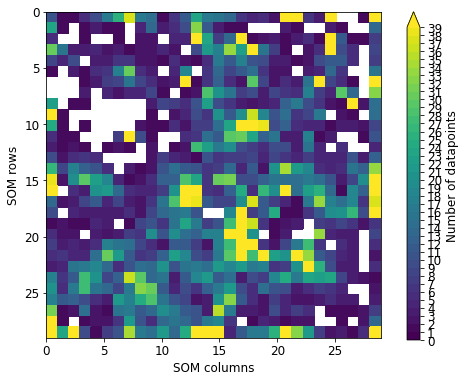

In [25]:
plot_som_histogram(bmu_list=bmu_list,n_rows=30,n_columns=30,n_datapoints_cbar=40,fontsize=12)

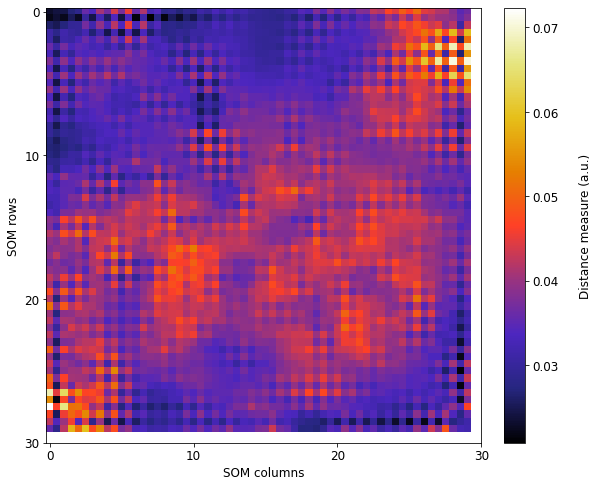

In [9]:
u_matrix = som.get_u_matrix()
cmap="CMRmap"
n_rows=30
n_colums=30
fontsize=12
_, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(u_matrix.squeeze(), cmap=cmap)
ax.set_xticks(np.arange(0, n_colums * 2 + 1, 20))
ax.set_xticklabels(np.arange(0, n_colums + 1, 10))
ax.set_yticks(np.arange(0, n_rows * 2 + 1, 20))
ax.set_yticklabels(np.arange(0, n_rows + 1, 10))

# ticks and labels
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
ax.set_ylabel("SOM rows", fontsize=fontsize)
ax.set_xlabel("SOM columns", fontsize=fontsize)

# colorbar
cbar = plt.colorbar(img, ax=ax, fraction=0.04, pad=0.04)
cbar.ax.set_ylabel(
    "Distance measure (a.u.)", rotation=90, fontsize=fontsize, labelpad=20
)
cbar.ax.tick_params(labelsize=fontsize)

# clustering

In [ ]:
import pickle

with open('/content/drive/MyDrive/ANN_Data/clusters_30.pickle', 'rb') as f:
    clusters = pickle.load(f)

In [10]:
clusters = som.get_clusters(X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed: 27.6min finished


In [22]:
import pickle
with open('/content/drive/MyDrive/ANN_Data/clusters_30_7.pickle', 'wb') as f:
    pickle.dump(clusters, f)

In [17]:
a=[c[1] for c in clusters]
b=[c[0] for c in clusters]

In [ ]:
index = np.zeros(len(y))
for i in range(len(y)):
  nonzero_indices=np.where(y[i]== 1)
  index[i] = nonzero_indices[0][0]

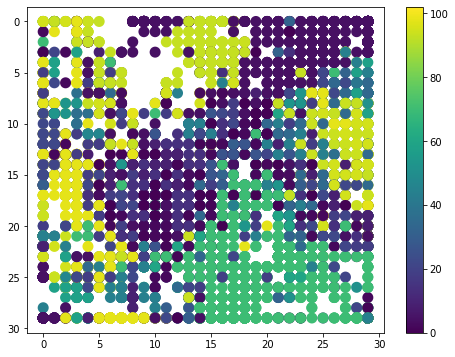

In [20]:
plt.figure(figsize=(8,6))
h = plt.scatter(a,b,c=np.argmax(y, axis=1),linewidths=5)
plt.gca().invert_yaxis()

# colorbar
plt.colorbar(h)

plt.show()

In [13]:
from collections import defaultdict
dic = defaultdict(list)

for i,point in enumerate(clusters):
  key = str(point)
  for a in np.where(y[i]==1)[0]:
    dic[key].append(a)

In [14]:
from collections import Counter
 
def most_frequent_count(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][1]

t= 0

for key,value in dic.items():
  t += most_frequent_count(value)

print(t/10000)

0.8662


In [ ]:
print(len(dic))

776


In [ ]:
g = som.get_quantization_error(X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed: 30.4min finished
